In [50]:
import pandas as pd
from utils.sql_fuction import create_connection
from utils.sql_query import rented_film_and_revenue
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
connection = create_connection("sqlite-sakila.db")

# Datatypes in python
# String
# Integer
# Float
# Boolean
# List
# Tuple
# Dictionary

# Examples
s = "Hello World"
# i = 42
# f = 3.14
# b = True
# l = [1, 2, 3]
# t = (1, 2, 3)
d = {"nandan": 10, "sai": 20}

# # tuple vs list
# # tuple is immutable
# # list is mutable
# # tuple is faster than list
# # tuple has less memory than list
# # tuple has no append, insert, remove, pop, clear, reverse, sort methods


# l.append(4)
# # Get last element of l
# print(l[:2])

print(d["nandan"])

Connection to SQLite is successful
10


In [38]:
df = pd.read_sql_query(rented_film_and_revenue, connection)
df. head()

,title,n_film,revenue_by_film
0,ACADEMY DINOSAUR,23,36.77
1,ACE GOLDFINGER,7,52.93
2,ADAPTATION HOLES,12,37.88
3,AFFAIR PREJUDICE,23,91.77
4,AFRICAN EGG,12,51.88


In [52]:
most_rented_film = df.sort_values("n_film", ascending=False)[["title", "n_film"]][:10]

/var/folders/75/50tn8f4573sdclnrq0qzr6gc0000gn/T/ipykernel_98005/3075289474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="n_film", y="title", palette="YlGnBu_r", data=most_rented_film)


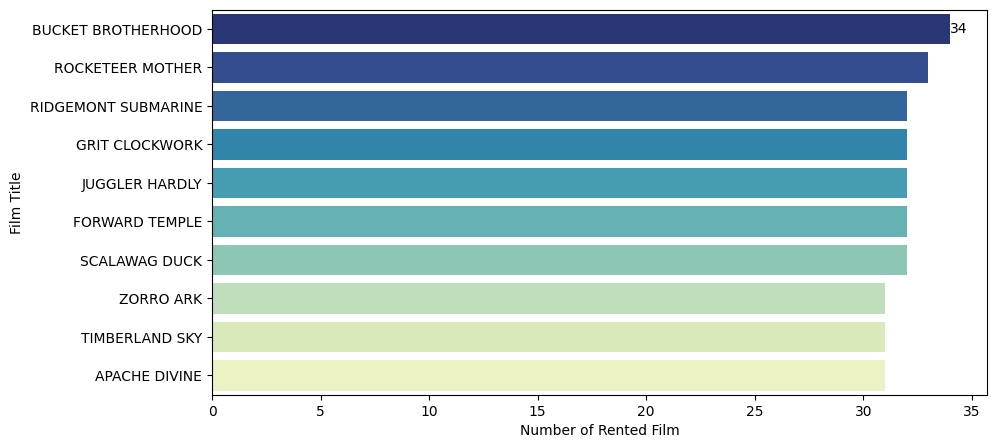

In [58]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="n_film", y="title", palette="YlGnBu_r", data=most_rented_film)
ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("Number of Rented Film") 
plt.ylabel("Film Title")

plt.show()

In [66]:
most_revenue_film =  df.sort_values("revenue_by_film", ascending=False)[["title", "n_film","revenue_by_film"]][:10]
print(most_revenue_film)

                 title  n_film  revenue_by_film
841   TELEGRAPH VOYAGE      27           231.73
930          WIFE TURN      31           223.69
957          ZORRO ARK      31           214.69
348  GOODFELLAS SALUTE      31           209.69
730     SATURDAY LAMBS      28           204.72
855        TITANS JERK      29           201.71
859       TORQUE BOUND      27           198.72
381        HARRY IDAHO      30           195.70
436     INNOCENT USUAL      26           191.74
420      HUSTLER PARTY      22           190.78


/var/folders/75/50tn8f4573sdclnrq0qzr6gc0000gn/T/ipykernel_98005/3114230717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="revenue_by_film", y="title", palette="YlGnBu_r", data=most_revenue_film)


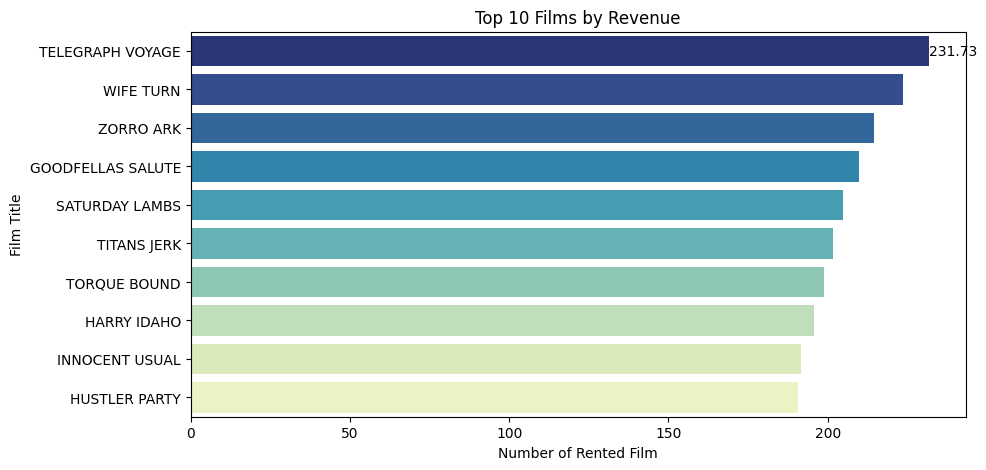

In [74]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="revenue_by_film", y="title", palette="YlGnBu_r", data=most_revenue_film)
ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("Number of Rented Film") 
plt.ylabel("Film Title")
plt.title("Top 10 Films by Revenue")
plt.show()

In [76]:
film_table_query = """
SELECT
title, rental_rate, replacement_cost
FROM film
"""

film_table = pd.read_sql_query(film_table_query, connection)
film_table.head()

,title,rental_rate,replacement_cost
0,ACADEMY DINOSAUR,0.99,20.99
1,ACE GOLDFINGER,4.99,12.99
2,ADAPTATION HOLES,2.99,18.99
3,AFFAIR PREJUDICE,2.99,26.99
4,AFRICAN EGG,2.99,22.99


In [85]:
rented_film_by_customer = """
WITH rented_film as (
SELECT
rental.customer_id, 
film.film_id,
film.title, 
film.rental_rate
FROM inventory
JOIN film ON inventory.film_id = film.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
)
SELECT
customer.first_name, customer.last_name,
count (rented_film.title) as n_film
FROM customer
LEFT JOIN rented_film ON customer.customer_id=rented_film.customer_id
GROUP BY customer.first_name, customer.last_name;
"""

In [86]:
df = pd.read_sql_query(rented_film_by_customer, connection)
df.head()

,first_name,last_name,n_film
0,AARON,SELBY,24
1,ADAM,GOOCH,22
2,ADRIAN,CLARY,19
3,AGNES,BISHOP,23
4,ALAN,KAHN,26


In [88]:
most_rented_fil_by_customer = df.sort_values("n_film", ascending=False)[:10]
print(most_rented_fil_by_customer)

    first_name last_name  n_film
175    ELEANOR      HUNT      46
318       KARL      SEAL      45
379     MARCIA      DEAN      42
105      CLARA      SHAW      42
536      TAMMY   SANDERS      41
590     WESLEY      BULL      40
531        SUE    PETERS      40
389     MARION    SNYDER      39
551        TIM      CARY      39
474     RHONDA   KENNEDY      39


/var/folders/75/50tn8f4573sdclnrq0qzr6gc0000gn/T/ipykernel_98005/1841311775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="n_film", y="full_name", palette="YlGnBu_r",data=most_rented_fil_by_customer)


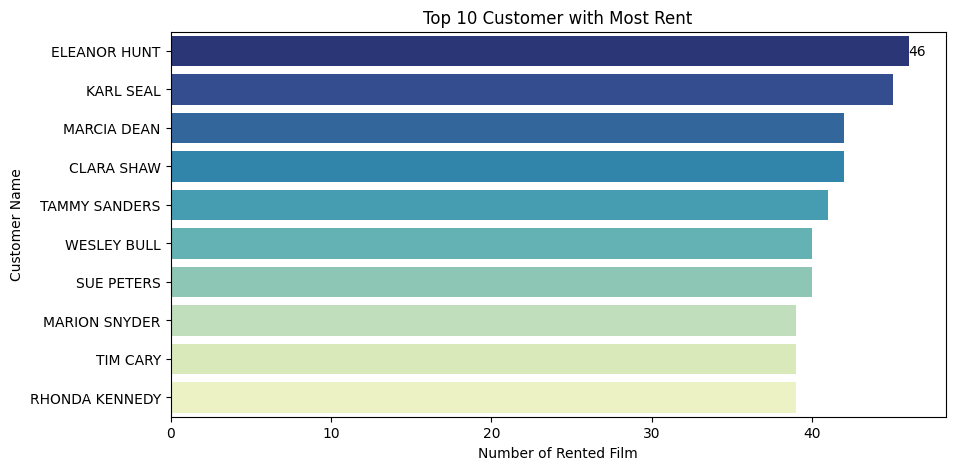

In [94]:
# Create new column that concates customer first and last name
most_rented_fil_by_customer["full_name"] = most_rented_fil_by_customer["first_name"] + " " +most_rented_fil_by_customer["last_name"]
plt.figure(figsize=(10, 5))

ax = sns.barplot(x="n_film", y="full_name", palette="YlGnBu_r",data=most_rented_fil_by_customer)
ax.bar_label(ax.containers[0])
ax.grid (False)

plt.xlabel("Number of Rented Film") 
plt.ylabel( "Customer Name")

plt.title("Top 10 Customer with Most Rent")
plt.show()

In [109]:
most_rented_fil_by_customer

,first_name,last_name,n_film,full_name
175,ELEANOR,HUNT,46,ELEANOR HUNT
318,KARL,SEAL,45,KARL SEAL
379,MARCIA,DEAN,42,MARCIA DEAN
105,CLARA,SHAW,42,CLARA SHAW
536,TAMMY,SANDERS,41,TAMMY SANDERS
590,WESLEY,BULL,40,WESLEY BULL
531,SUE,PETERS,40,SUE PETERS
389,MARION,SNYDER,39,MARION SNYDER
551,TIM,CARY,39,TIM CARY
474,RHONDA,KENNEDY,39,RHONDA KENNEDY
